In [1]:
import pandas as pd
import numpy as np
import scipy.io as sc
from scipy.io import wavfile
import tkinter as tk
from tkinter import *
from tkinter import ttk as ttk
from tkinter import filedialog as fd
from tkinter.messagebox import showinfo
import os as os
from pydub import AudioSegment
from pydub.playback import play
import subprocess
import math
import random
import datetime
#from datetime import datetime
from datetime import timedelta
from pytz import timezone
from PIL import ImageTk , Image

#GLOBAL CONSTANTS TO CHANGE:
path_to_wavs = '/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles'
path_to_working_folder = '/Users/arjun/Box/box-group-lena-studies/Soundscape/ucsf_app_stuff'
childid_bank = set()

In [5]:
dir_list = os.listdir(path_to_wavs)
for eachfile in dir_list:
    underscore = eachfile.find('_')
    if (underscore<0):
        underscore = eachfile.find('.')
    id = eachfile[0:underscore]
    childid_bank.add(id)

In [16]:
newtxt = os.path.join(path_to_working_folder, 'avail_child_ID.txt')

with open(newtxt, 'w') as f:
    for i in childid_bank:
        f.write(i+'\n')

In [ ]:
# creates a file with all children
# should I run on all children to process wavs?

## Experimenting with visualizations

In [3]:
# constants to be updated
CHNcsvpath = '/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles/032LTP2_voc_output/032LTP2_CHN_timestamps.csv'


In [4]:
chndf = pd.read_csv(CHNcsvpath)

In [17]:
pd.to_numeric(chndf['onset'], downcast="float")
pd.to_numeric(chndf['offset'], downcast="float")
pd.to_numeric(chndf['childUttCnt'], downcast="integer")
pd.to_numeric(chndf['seconds'], downcast="integer")

0          60
1          60
2         240
3         240
4         240
        ...  
3617    44940
3618    45000
3619    45360
3620    45600
3621    45600
Name: seconds, Length: 3622, dtype: int32

In [9]:
chndf 

,Unnamed: 0,seg_id,onset,offset,duration,avg_dB,peak_dB,childUttCnt,childUttLen,childCryVfxLen,its_file_name,seconds,segment_type
0,0,1,24.70,25.30,0.60,-36.13,-29.16,0,P0.00S,PT0.53S,032LTP2,60.0,CHN
1,1,2,26.10,26.98,0.88,-28.78,-20.66,0,P0.00S,PT0.75S,032LTP2,60.0,CHN
2,2,3,183.32,184.02,0.70,-21.99,-12.00,0,P0.00S,PT0.70S,032LTP2,240.0,CHN
3,3,4,184.02,184.83,0.81,-19.91,-11.12,0,P0.00S,PT0.72S,032LTP2,240.0,CHN
4,4,5,184.83,185.47,0.64,-20.26,-11.38,0,P0.00S,PT0.44S,032LTP2,240.0,CHN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,3617,3618,44903.44,44904.24,0.80,-18.82,-12.87,1,P0.80S,P0.00S,032LTP2,44940.0,CHN
3618,3618,3619,44967.47,44968.41,0.94,-30.13,-17.61,2,P0.94S,P0.00S,032LTP2,45000.0,CHN
3619,3619,3620,45323.14,45325.11,1.97,-34.47,-27.69,1,P1.89S,P0.00S,032LTP2,45360.0,CHN
3620,3620,3621,45553.09,45555.79,2.70,-30.89,-23.58,1,P2.57S,P0.00S,032LTP2,45600.0,CHN


In [25]:

s = chndf [['childUttCnt' ]]
N = 250
countgroups = s.groupby(s.index // N).sum()


In [22]:
bins_of_seconds = []
for i in range(250, len(chndf),250):
    bins_of_seconds.append(chndf['seconds'][i])
bins_of_seconds.append(chndf['seconds'][len(chndf)-1])

In [23]:
bins_of_seconds

[4380.0,
 9120.0,
 10320.0,
 11880.0,
 15540.0,
 17520.0,
 20100.0,
 28020.0,
 30300.0,
 31920.0,
 34980.0,
 38400.0,
 40380.0,
 43140.0,
 45600.0]

In [27]:
bardf = pd.DataFrame()
bardf['bins']=bins_of_seconds
bardf['counts']=countgroups

In [28]:
import seaborn as sns
barplotdata = bardf.pivot(columns="bins", values="counts")
sns.barplot(barplotdata) 

sns.barplot(x = 'bins',
            y = 'fare',
            hue = 'class',
            data = df,
            palette = "Blues")
 
# Show the plot
plt.show()

/Users/arjun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

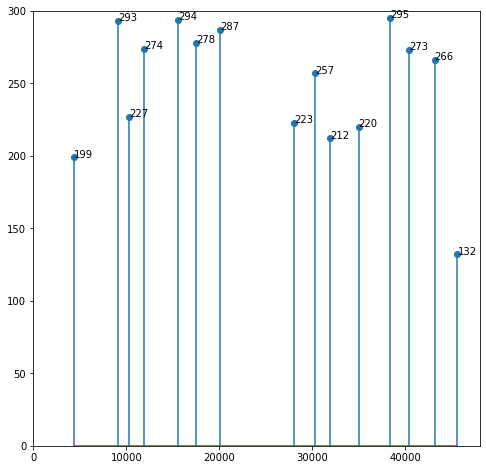

In [44]:
# make data
x = bardf['bins']
y = bardf['counts']

# plot
fig, ax = plt.subplots(figsize=(8,8))

ax.stem(x, y)

ax.set(xlim=(0, 48000), ylim=(0,300))
for a,b in zip(x, y): 
    plt.text(a, b, str(b))

plt.show()

In [48]:
d1 = chndf.groupby('seconds').sum()
N = 25#d1.groupby(d1.index // N).sum()
d1

,Unnamed: 0,seg_id,onset,offset,duration,avg_dB,peak_dB,childUttCnt
seconds,,,,,,,,
60.0,1,3,50.80,52.28,1.48,-64.91,-49.82,0
240.0,104,117,2629.15,2640.23,11.08,-317.42,-202.98,4
300.0,66,70,1062.71,1070.22,7.51,-90.33,-59.50,1
360.0,180,188,2726.85,2733.80,6.95,-221.69,-152.30,5
420.0,114,118,1559.59,1563.80,4.21,-98.07,-66.08,1
...,...,...,...,...,...,...,...,...
44820.0,3614,3615,44799.80,44800.63,0.83,-30.16,-22.27,1
44940.0,10848,10851,134685.75,134687.84,2.09,-55.01,-36.46,3
45000.0,3618,3619,44967.47,44968.41,0.94,-30.13,-17.61,2


In [53]:
d1.index
intervals = [x for x in range(0,45600,1800)]

In [55]:
intervals.append(45600)

In [60]:
d1.index[2]

300.0

In [106]:
mainlist = []
start_interval = 0
curr_bound = intervals[start_interval]
uttlist = list(d1['childUttCnt'])
countsum = 0
for row in range (0,len(d1)):
        if (d1.index[row]<=curr_bound):
            countsum = countsum + uttlist[row]
        else:
            countsum = countsum + uttlist[row]
            row= row-1
            
            mainlist.append(countsum)
            countsum =0
            start_interval = start_interval+1
            curr_bound = intervals[start_interval]
            continue
            start_interval = start_interval+1
            if (start_interval == len(intervals)):
                #countsum = countsum + uttlist[row]
                row = row-1
                mainlist.append(countsum)
                break
            else:
                curr_bound = intervals[start_interval]
                #countsum = countsum + uttlist[row]
                row = row-1
                mainlist.append(countsum)
                countsum = 0


In [124]:
from statistics import mean
lowerbound = 0
mainlist = []
xpoints = []
for i in range(0,len(intervals)):
    upperbound = intervals[i]
    mainlist.append(d1[(d1.index>lowerbound) & (d1.index<=upperbound)].sum()['childUttCnt'])
    xpoints.append(mean([lowerbound,upperbound]))
    lowerbound = intervals[i]


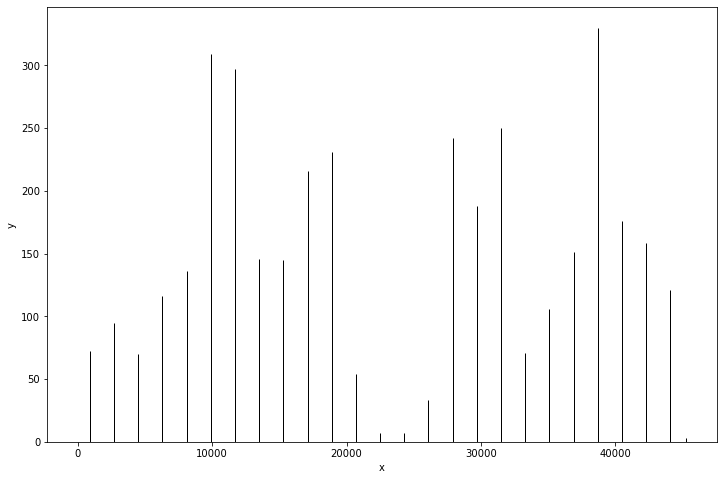

In [137]:
import matplotlib.pyplot as plt
x = xpoints
y = mainlist
#for modifying figsize
fig, ax = plt.subplots(figsize=(12,8))
plt.bar(x, y,   edgecolor="black")
#for i, j in zip(x,y):
    #ax.text(i,j, str(j), ha='center', va='bottom')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

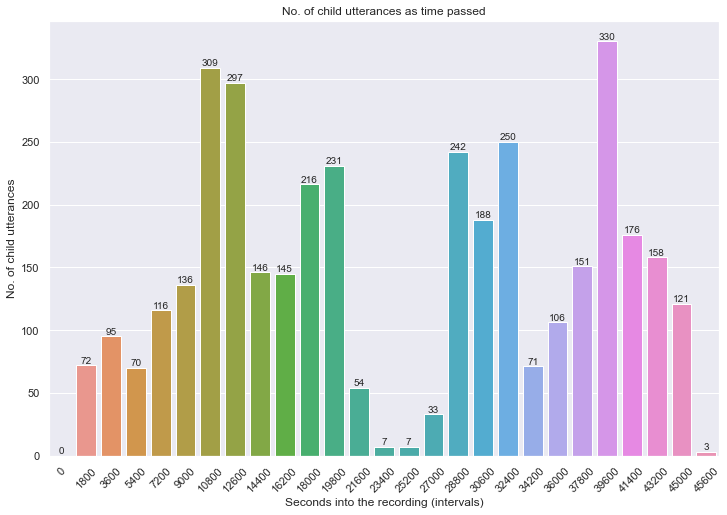

In [149]:
ax = sns.barplot(x = xpoints,
            y = mainlist)
ax.bar_label(ax.containers[0], fontsize=10)
sns.set(rc={'figure.figsize':(12,8)})
#ax.set_xticks(range(0,45600))  
ax.set_xticklabels(intervals)
plt.xticks(rotation=45)
ax.set(xlabel='Seconds into the recording (intervals)', ylabel='No. of child utterances')
plt.title("No. of child utterances as time passed")
plt.show()